In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

    
def pos_tinkering(pos, pos_cutoff):
    if pos > pos_cutoff:
        return 1
    else:
        return 0
def sensitivity(y_true, y_pred):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true[i] == 1:
                tp+=1
            else:
                tn+=1
        else:
            if y_pred[i] == 1:
                fp+=1
            else:
                fn+=1
    total_pos = tp+fn
    sens = tp/total_pos
    return sens


def specifcity(y_true, y_pred):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true[i] == 1:
                tp+=1
            else:
                tn+=1
        else:
            if y_pred[i] == 1:
                fp+=1
            else:
                fn+=1
    total_neg = tn+fp
    spec = tn/total_neg
    return spec

def results(neg_vals, pos_vals):
    vals = []
    for i in range(len(neg_vals)):
        if neg_vals[i] > pos_vals[i]:
            vals.append(0)
        else:
            vals.append(1)
    return vals 

In [233]:

files={"Resilience":"percent_vsKR_scibert_Resilience.csv", 
       "Conditions":"percent_vsKR_scibert_Conditions.csv", 
       "Stressors":"percent_vsKR_scibert_Stressors.csv", "Biomarkers":"percent_vsKR_scibert_Biomarkers.csv"}

answers = pd.read_csv("/Users/mark/Projects/meta_analysis/manual_review/test_sheets_scibert/complete_n360_methods.csv")
def cutoffs(neg, pos, answer, pos_cutoff = -1):
    if pos_cutoff == -1:
        if neg > pos:
            return 0
        else: 
            return 1
    if pos > pos_cutoff:
        return 1
    else:
        if neg > pos:
            return 0
        else:
            return 1
def fdr(y_true, y_pred):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true[i] == 1:
                tp+=1
            else:
                tn+=1
        else:
            if y_pred[i] == 1:
                fp+=1
            else:
                fn+=1
 
    total_pos = tp+fp
    total = tp+fp+tn+fn
    fd_r = fp/total_pos
    return fd_r

def f_score(y_true, y_pred):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true[i] == 1:
                tp+=1
            else:
                tn+=1
        else:
            if y_pred[i] == 1:
                fp+=1
            else:
                fn+=1
    num = 2*tp
    den = num + fp + fn
    return num/den

def true_false(y_true, y_pred):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true[i] == 1:
                tp+=1
            else:
                tn+=1
        else:
            if y_pred[i] == 1:
                fp+=1
            else:
                fn+=1
    return [tp, fp, tn, fn]

Resilience 60
39


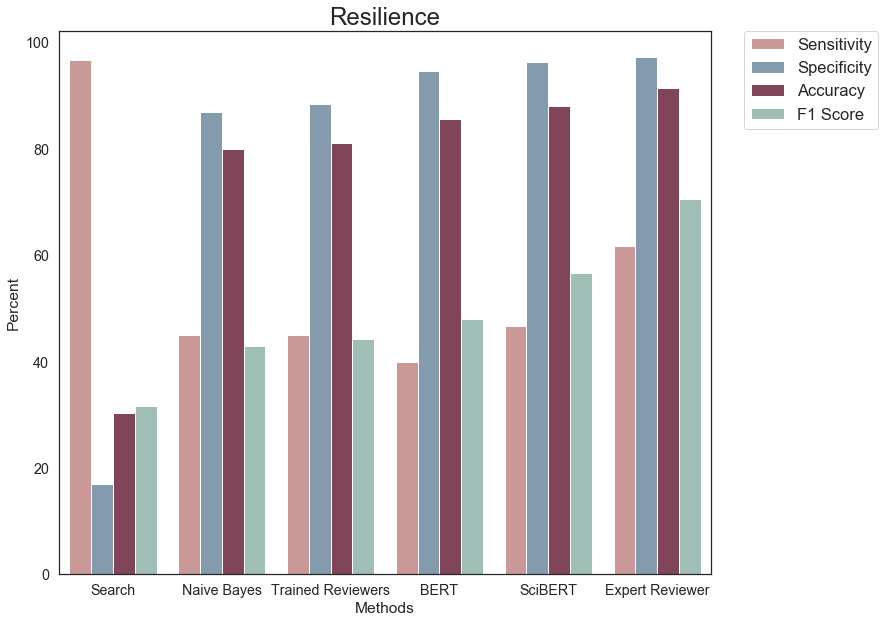

Conditions 40
18


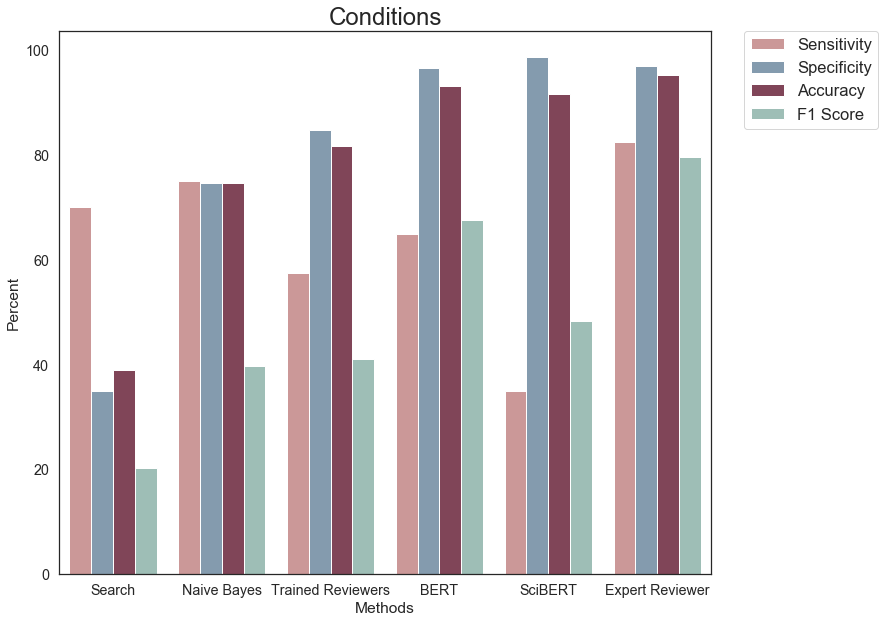

Stressors 28
70


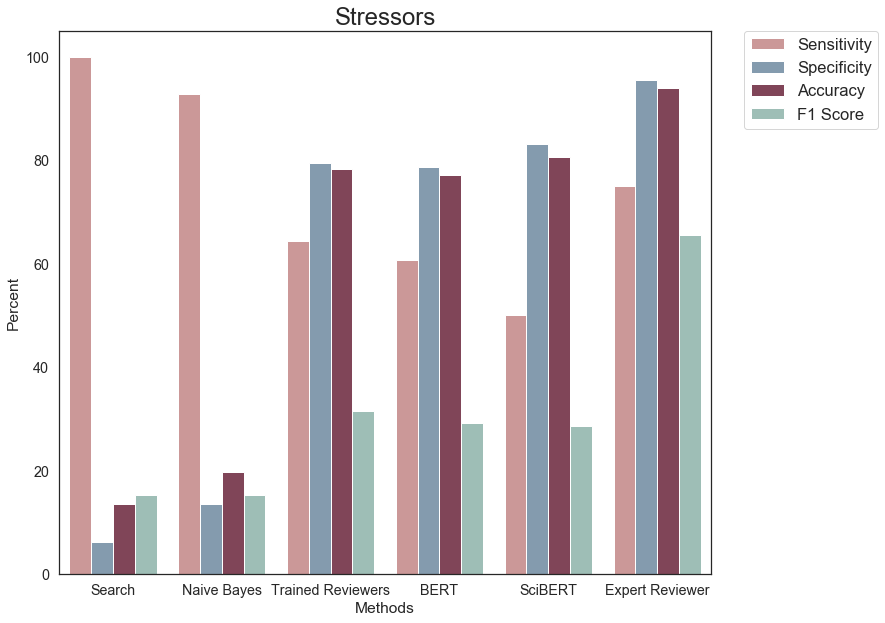

Biomarkers 254
232


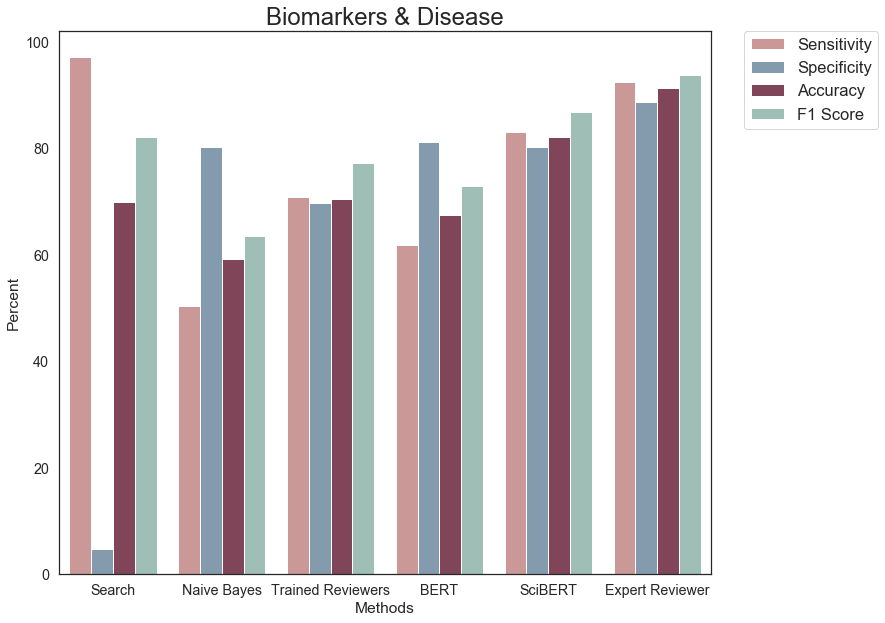

In [234]:
"""
for i in files.keys():
    df = pd.read_csv(files[i])
    original_score = results(df["Negative Class Confidence Scores"], df["Postive Class Confidence Scores"])

    answer_col = answers["KR_"+i]
    ranges = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]
    sens = []
    spec = []
    acc = []
    for t in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9]:
        cut_off_score = []
        for j in range(len(df["Negative Class Confidence Scores"])):

        cut_off_score.append(cutoffs(neg=df["Negative Class Confidence Scores"][j], pos=df["Postive Class Confidence Scores"][j], answer=answer_col[j], pos_cutoff=t))
        spec.append(specifcity(y_true=answer_col, y_pred= cut_off_score))
        sens.append(sensitivity(y_true=answer_col, y_pred= cut_off_score))
        acc.append(accuracy_score(y_true=answer_col, y_pred= cut_off_score))

    df_dict = {"Cutoffs": ranges, "Sensitivity": sens, "Specificity": spec, "Accuracy":acc}
    plot_df = pd.DataFrame.from_dict(df_dict).set_index('Cutoffs').reset_index()
    plot_df_tidy = pd.melt(plot_df, id_vars=["Cutoffs"], value_name="Score")
    lplot = sns.lineplot(x="Cutoffs", y="Score",hue="variable", data=plot_df_tidy)
    plt.title(i + " Forced Positive based on cutoff")
    plt.savefig("Tinkering"+i+".png")
    plt.show()
"""
#Inter-rater reliability instead of consistency 
for i in files.keys():
    sens = []
    spec = []
    accuracy = []
    fdr_rate = []
    truth = []
    mcc = []
    fscore = []
    methods = ["search_","NB_", "trained_reviewers_", "bert", "sci_bert", "Singh_"]
    pretty_methods = ["Search", "Naive Bayes", "Trained Reviewers", "BERT", "SciBERT", "Expert Reviewer"]
    print(i, sum(answers["KR_"+i]))
    for j in methods:
        accuracy.append(100*accuracy_score(y_true=answers["KR_"+i], y_pred= answers[j+i]))
        sens.append(100*sensitivity(y_true=answers["KR_"+i],y_pred= answers[j+i]))
        spec.append(100*specifcity(y_true=answers["KR_"+i], y_pred= answers[j+i]))
        fdr_rate.append(100*fdr(y_true=answers["KR_"+i], y_pred= answers[j+i]))
        truth.append(true_false(y_true=answers["KR_"+i], y_pred= answers[j+i]))
        mcc.append(100*matthews_corrcoef(y_true=answers["KR_"+i], y_pred= answers[j+i]))
        fscore.append(100*f_score(y_true=answers["KR_"+i], y_pred= answers[j+i]))
    print(sum(answers["sci_bert"+i]))
    df_dict = {"Methods": pretty_methods, "Sensitivity": sens, "Specificity": spec, "Accuracy":accuracy, "F1 Score":fscore}
    
    plot_df = pd.DataFrame.from_dict(df_dict)
    
    plot_df_tidy = pd.melt(plot_df, id_vars=["Methods"], value_name="Percent")
    
    sns.set_context("notebook")
    palette = {"Accuracy": "#8a3b54", 
              "Sensitivity":"#d38f8f",
              "Specificity": "#7d9cb5",
              "F1 Score": "#99c3b9",}
    sns.set(style="white",rc={'figure.figsize':(11.7,10)}, font_scale=1.3)
    ax = sns.barplot(x="Methods", y="Percent", hue="variable", data=plot_df_tidy, palette=palette)
    sns.set(style="white", font_scale=1.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if i == "Biomarkers":
        plt.title("Biomarkers & Disease", size=24)
    else:    
        plt.title(i, size=24)
    #plt.figure(figsize=(20,5))
    plt.savefig("Scores"+i+".png", bbox_inches='tight', dpi=600)
    plt.show()
    
    next_df_dict = {"Methods": pretty_methods, "True Positives": [i[0] for i in truth], "False Positives":[i[1] for i in truth],
                   "True Negatives":[i[2] for i in truth], "False Negatives":[i[3] for i in truth]}
    table_df = pd.DataFrame.from_dict(next_df_dict)
    table_df.to_csv(i+"_table.csv", index=False)

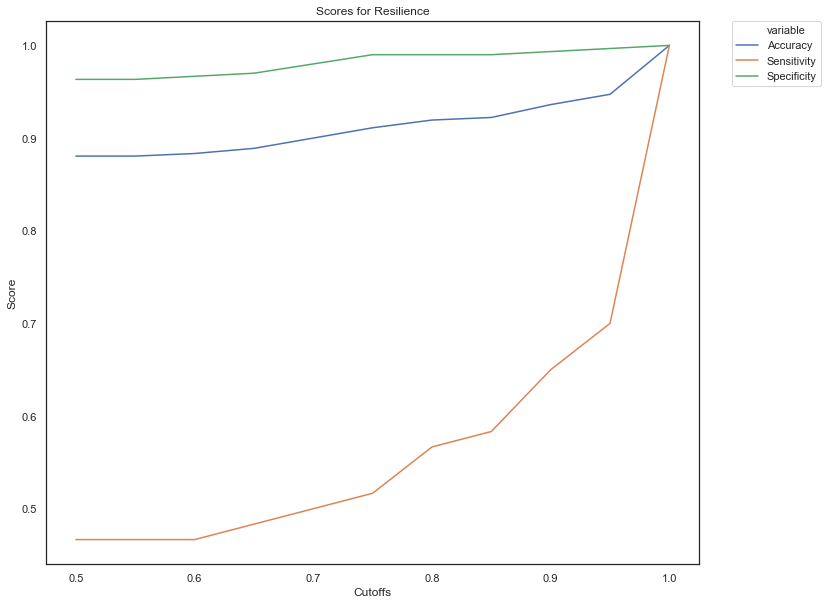

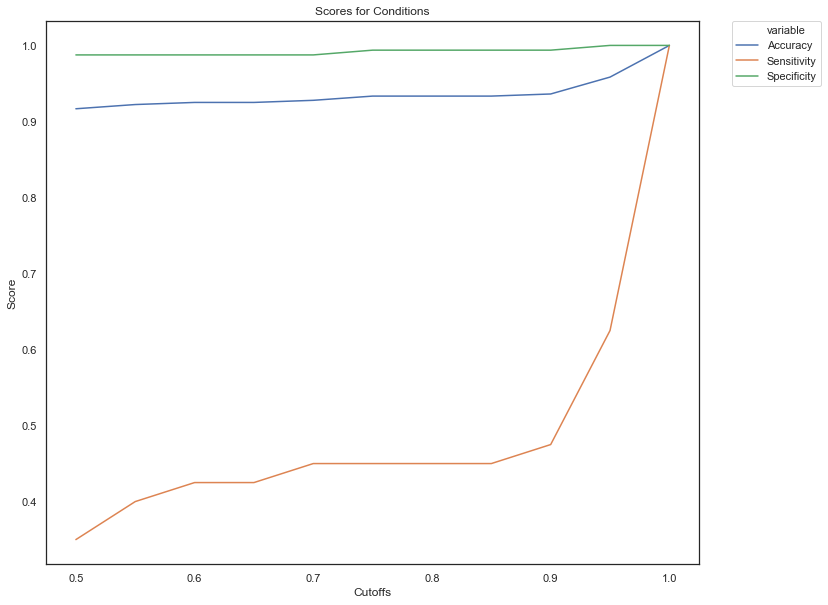

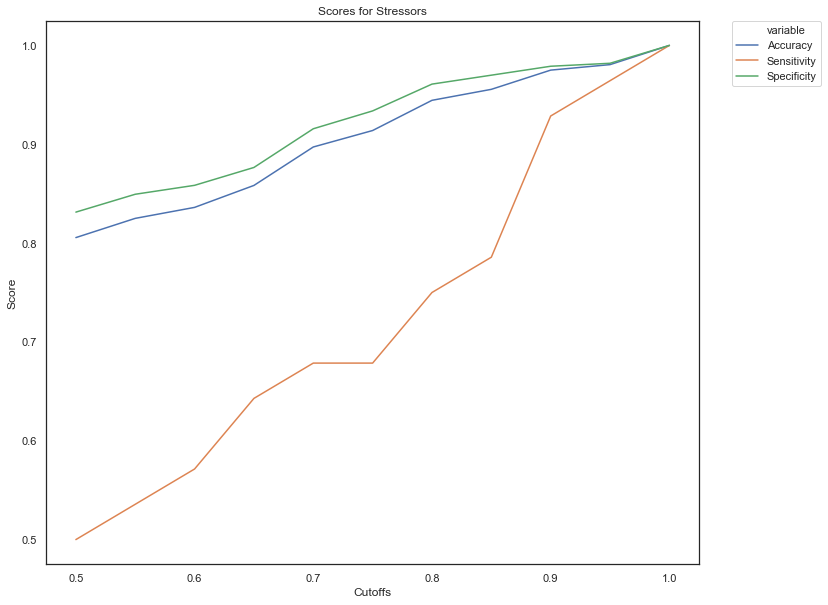

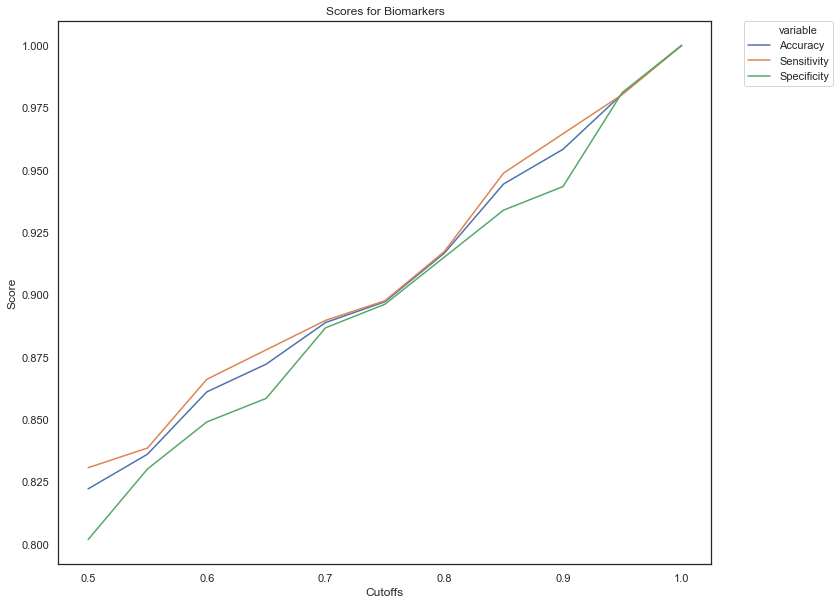

In [27]:

def augment(negs, poses, cutoff, answers):
    new_col = []
    intervened = 0
    for i in range(len(negs)):

        if negs[i] > cutoff or poses[i] > cutoff:
            if negs[i] > poses[i]:
                new_col.append(0)
            else:
                new_col.append(1)
        if negs[i] < cutoff and poses[i] < cutoff:
            new_col.append(answers[i])
            intervened+=1
    return new_col, intervened

for i in files.keys():
    df = pd.read_csv(files[i])
    original_score = results(df["Negative Class Confidence Scores"], df["Postive Class Confidence Scores"])
    answer_col = answers["KR_"+i]
    cutoffs = [.5,.55,.6,.65,.7,.75,.8, .85,.9,.95, 1]

    mod_acc = []
    mod_sens = []
    mod_spec = []
    for j in cutoffs:
        new_col, augmented_count = augment(df["Negative Class Confidence Scores"].values, df["Postive Class Confidence Scores"].values, j, answer_col.values)
        mod_acc.append(accuracy_score(y_true=answer_col, y_pred=new_col))
        mod_sens.append(sensitivity(y_true=answer_col, y_pred=new_col))
        mod_spec.append(specifcity(y_true=answer_col, y_pred=new_col))
        
    df_dict = {"Cutoffs":cutoffs, "Accuracy":mod_acc, "Sensitivity":mod_sens, "Specificity":mod_spec}
    plot_df = pd.DataFrame.from_dict(df_dict)
    
    plot_df_tidy = pd.melt(plot_df, id_vars=["Cutoffs"], value_name="Score")
    
    sns.set_context("notebook")
   
    sns.set(style="white",rc={'figure.figsize':(11.7,10)})
    lplot = sns.lineplot(x="Cutoffs", y="Score",hue="variable", data=plot_df_tidy)
    sns.set(style="white")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.title("Scores for "+i)
    #plt.figure(figsize=(20,5))
    plt.savefig("Augmentation Calculated"+i+".png", bbox_inches='tight', dpi=900)
    plt.show()

    Labels  Neg Class Score  Predicted
11       0         0.943780          0
13       1         0.860859          0
26       0         0.890219          0
31       0         0.857364          0
37       1         0.683142          0
truths [0, 0, 67, 14]
81
0.925


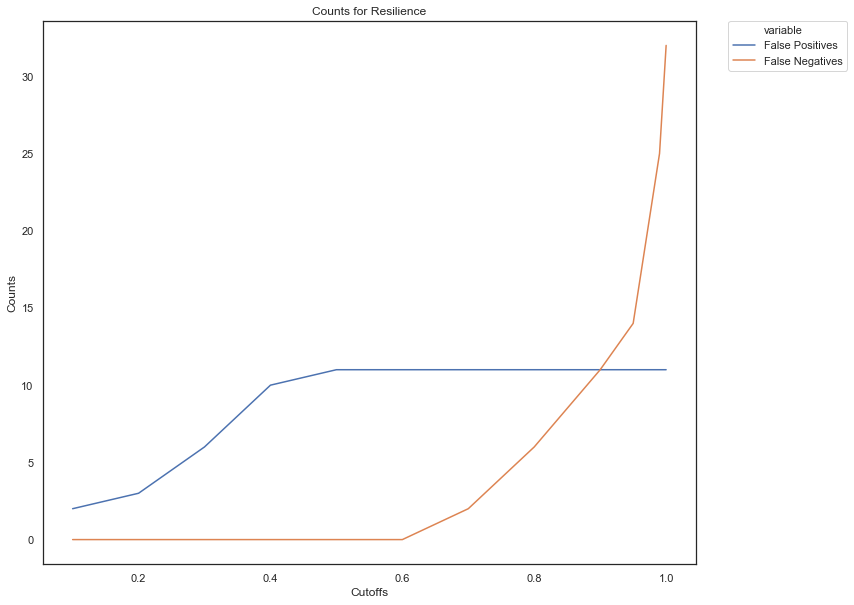

    Labels  Neg Class Score  Predicted
23       0         0.936683          0
37       0         0.661380          0
49       0         0.900602          0
53       1         0.655530          0
63       0         0.566680          0
truths [0, 0, 12, 11]
23
0.9529780564263323


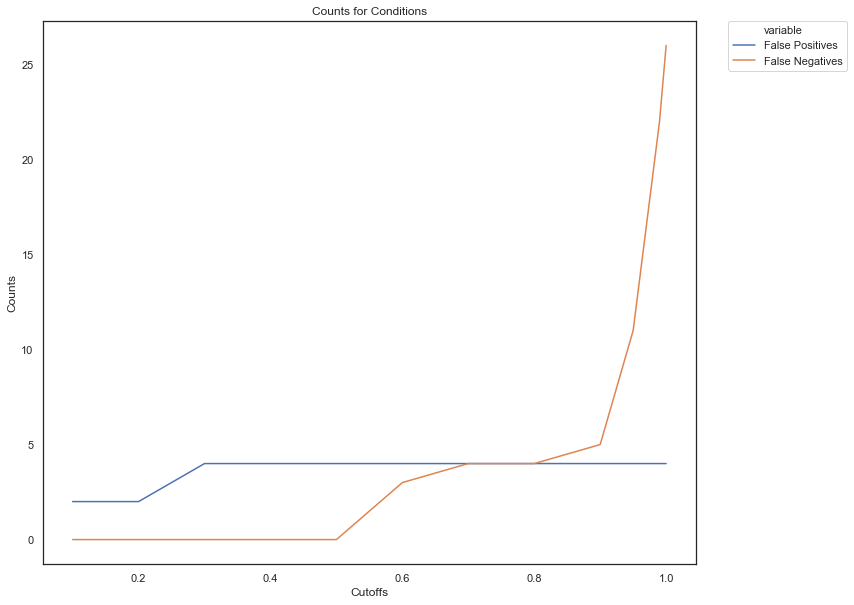

   Labels  Neg Class Score  Predicted
0       0         0.871387          0
1       0         0.939367          0
2       0         0.645051          0
3       0         0.907624          0
4       0         0.606513          0
truths [0, 0, 251, 13]
264
0.9615384615384616


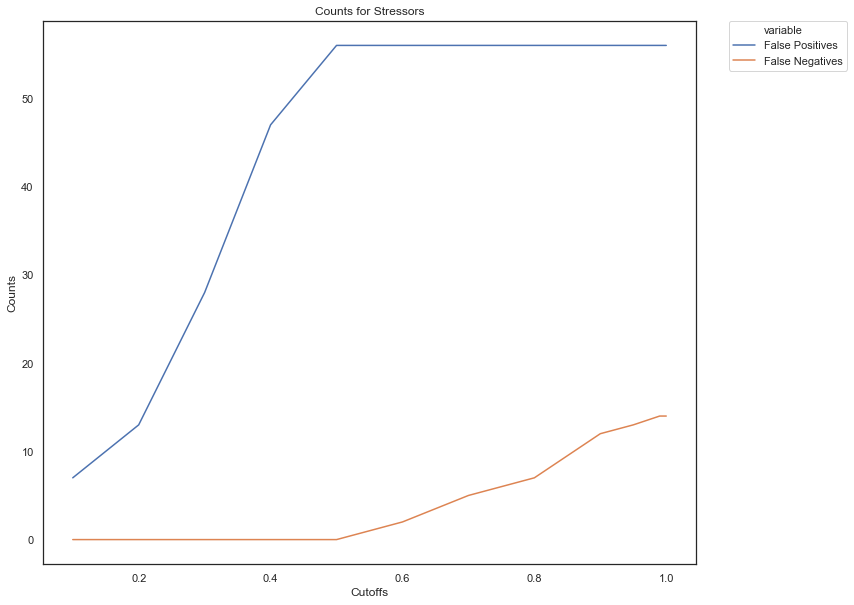

    Labels  Neg Class Score  Predicted
4        0         0.671247          0
6        0         0.918959          0
9        0         0.559569          0
10       1         0.779695          0
12       0         0.641542          0
truths [0, 0, 51, 38]
89
0.8717948717948718


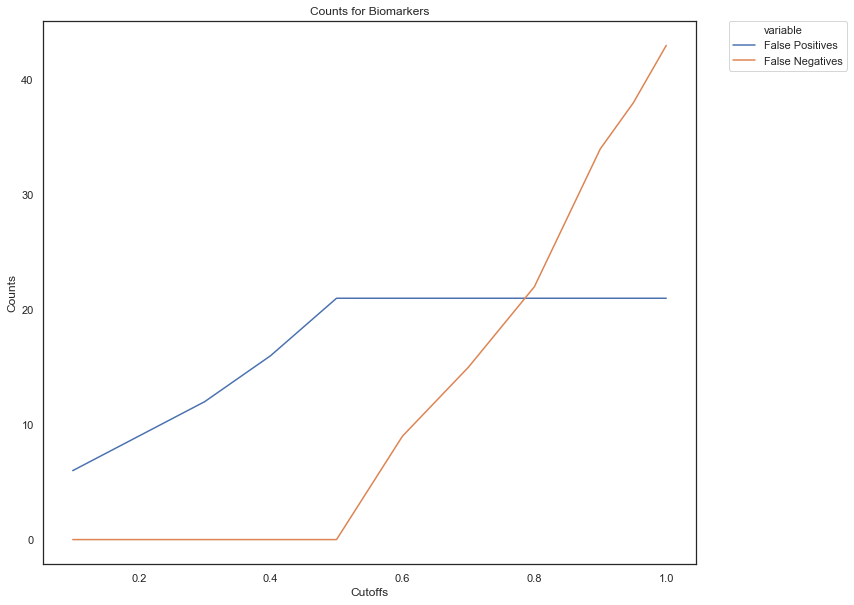

In [63]:
def count_truths(y_true, y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1:
            if y_true[i] == y_pred[i]:
                tp+=1
            else:
                fn+=1
        elif y_true[i] == 0:
            if y_true[i] == y_pred[i]:
                tn+=1
            else:
                fp+=1
    return [tp, fp, tn, fn]
for i in files.keys():
    df = pd.read_csv(files[i])
    original_score = results(df["Negative Class Confidence Scores"], df["Postive Class Confidence Scores"])
    answer_col = answers["KR_"+i]
    new_df = pd.DataFrame()
    new_df["Labels"] = answer_col
    new_df["Neg Class Score"] = df["Negative Class Confidence Scores"]
    new_df["Predicted"] = original_score
    counts = []
    chunks = [.1, .2, .3, .4, .5, .6, .7, .8, .9,.95,.99, 1]
    super_temp_df = new_df[new_df["Neg Class Score"] < .95]
    super_temp_df = super_temp_df[super_temp_df["Neg Class Score"] > .5]
    
    
    print(super_temp_df.head())
    print("truths", count_truths(y_true=super_temp_df["Labels"].values, y_pred=super_temp_df["Predicted"].values))
    
    
    
    print(len(super_temp_df["Neg Class Score"].values))
    super_super_temp_df=new_df[new_df["Neg Class Score"] > .95]
    print(accuracy_score(y_true=super_super_temp_df["Labels"].values, y_pred=super_super_temp_df["Predicted"].values))
    for j in chunks:
        temp_df = new_df[new_df["Neg Class Score"] < j]
        counts.append(count_truths(y_true=temp_df["Labels"].values, y_pred=temp_df["Predicted"].values))
    df_dict = {"Cutoffs":chunks, "False Positives":[i[1] for i in counts],
               "False Negatives":[i[3] for i in counts]}
    plot_df = pd.DataFrame.from_dict(df_dict) 
    plot_df_tidy = pd.melt(plot_df, id_vars=["Cutoffs"], value_name="Counts")
    
    sns.set_context("notebook")
   
    sns.set(style="white",rc={'figure.figsize':(11.7,10)})
    lplot = sns.lineplot(x="Cutoffs", y="Counts",hue="variable", data=plot_df_tidy)
    sns.set(style="white")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.title("Counts for "+i)
    #plt.figure(figsize=(20,5))
    plt.savefig("counts"+i+".png", bbox_inches='tight', dpi=900)
    plt.show() 

In [156]:
abstracts = {}
for i in files.keys():
    print(i)
    
    df = pd.read_csv(files[i])

    original_score = results(df["Negative Class Confidence Scores"], df["Postive Class Confidence Scores"])
    sub_df = df[df["Negative Class Confidence Scores"]>.5]
    nine = sub_df[sub_df["Negative Class Confidence Scores"] < .9]["abstracts"].values
    ninefive = sub_df[sub_df["Negative Class Confidence Scores"] < .95]["abstracts"].values
    abstracts[i] = [nine, ninefive]
allnine = []
allninefive = []
for i in abstracts.keys():
    if i != "Stressors":
        allnine+=list(abstracts[i][0])
        allninefive+=list(abstracts[i][1])
    
print(len(set(allnine)))
print(len(set(allninefive)))

Resilience
Conditions
Stressors
Biomarkers
120
160


             Category                     variable    Percent
0     Human Reviewers    Trained Reviewer Accuracy  70.555556
1     No Augmentation    Trained Reviewer Accuracy   0.000000
2   Lower Conf. Range    Trained Reviewer Accuracy   0.000000
3  Higher Conf. Range    Trained Reviewer Accuracy   0.000000
4     Human Reviewers  Trained Reviewer Sensitvity  70.866142


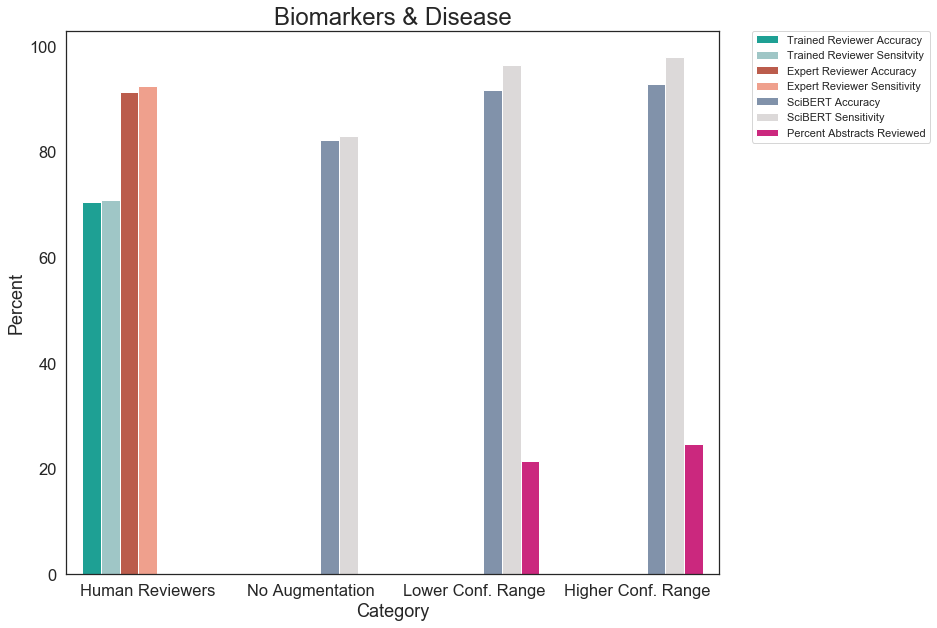

             Category                     variable    Percent
0     Human Reviewers    Trained Reviewer Accuracy  78.333333
1     No Augmentation    Trained Reviewer Accuracy   0.000000
2   Lower Conf. Range    Trained Reviewer Accuracy   0.000000
3  Higher Conf. Range    Trained Reviewer Accuracy   0.000000
4     Human Reviewers  Trained Reviewer Sensitvity  64.285714


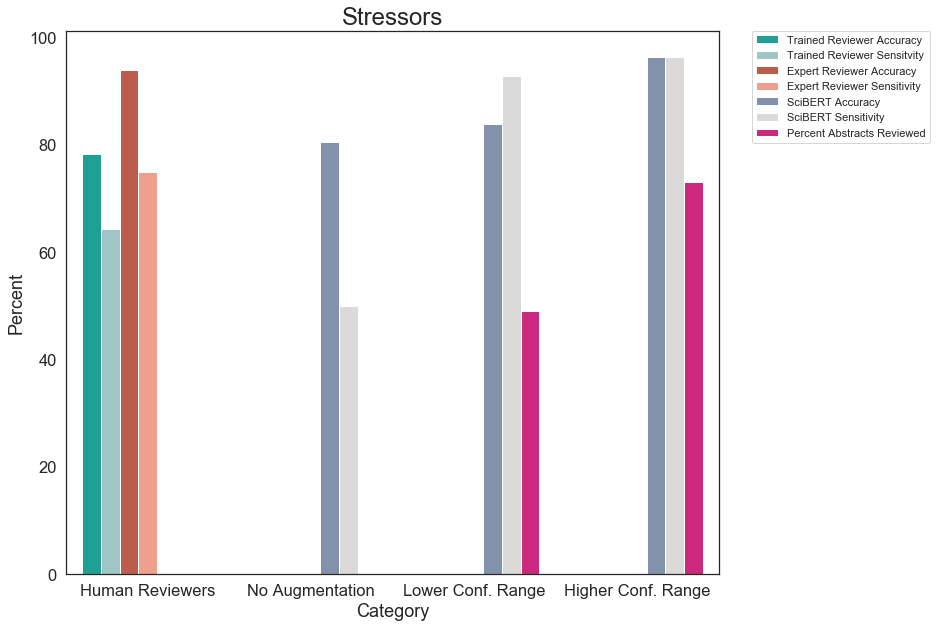

                       Category                         variable    Percent
0          Human \\n  Reviewers     Trained Reviewer \n Accuracy  57.500000
1               No Augmentation     Trained Reviewer \n Accuracy   0.000000
2    Lower \\n Confidence Range     Trained Reviewer \n Accuracy   0.000000
3  Higher  \\n Confidence Range     Trained Reviewer \n Accuracy   0.000000
4          Human \\n  Reviewers  Trained Reviewer \\n Sensitvity  81.666667


KeyError: 'Trained Reviewer \\n Accuracy'

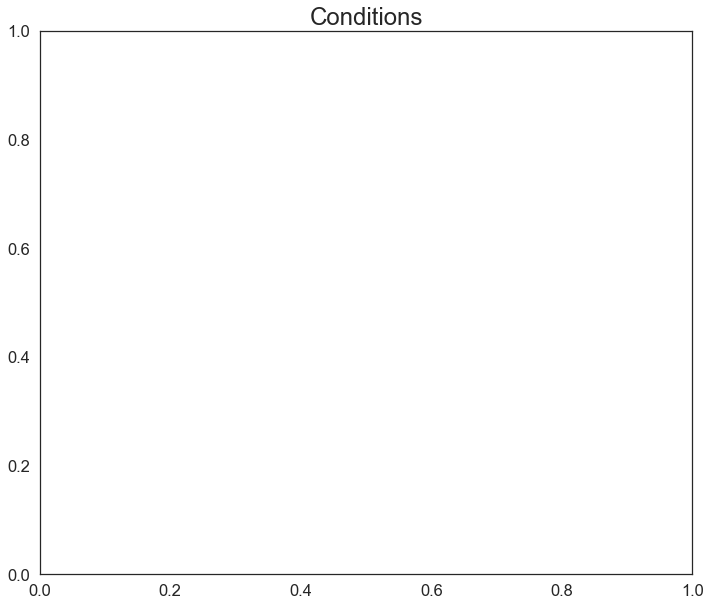

In [243]:
graphing_files = [["biomarkers_augment.csv", "biomarkers_count.csv"], ["stressors_augment.csv", "stressors_count.csv"],
                 ["conditions_augment.csv", "conditions_count.csv"], ["resilience_augment.csv", "resilience_count.csv"]]
for i in graphing_files:
   
    df= pd.read_csv(i[0])
    plot_df_tidy = pd.melt(df, id_vars=["Category"], value_name="Percent")
    count_df = pd.read_csv(i[1])
    print(plot_df_tidy.head())
    
    
    titles = {"biomarkers":"Biomarkers & Disease", "resilience":"Resilience", "stressors":"Stressors", "conditions":"Conditions"}
    title_var = titles[i[0].split("_")[0]]
    sns.set(style="white", font_scale=1.5)
    plt.title(title_var, size=24)
    sns.set_context("notebook")
    palette = {"Trained Reviewer Accuracy": "#09b5a6", 
              "Trained Reviewer Sensitvity":"#99cccc",
              "Expert Reviewer Accuracy": "#cd4f39",
              "Expert Reviewer Sensitivity": "#ff967d",
              "SciBERT Accuracy": "#7a91b1",
              "SciBERT Sensitivity": "#dcd8d9",
              "Percent Abstracts Reviewed":"#e60d80"}
    ax = sns.barplot(x="Category", y="Percent", hue="variable", data=plot_df_tidy, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig("Bar Augmentation for "+title_var+".png", bbox_inches='tight', dpi=600)
 
    plt.show() 

In [241]:
abstract_info = pd.read_csv("/Users/mark/Projects/meta_analysis/manual_review/Final Sheets/cancer_annotated.csv")

print(abstract_info.head())
years = abstract_info["Year"].values
print(min(years), max(years))
journals = set([i.lower for i in list(map(str, set(abstract_info["Publication.Title"].values)))])
print(len(journals))

         PMID                                           Citation  Year  \
0  15821561.0  Penson DF, McLerran D, Feng Z, Li L, Albertsen...  2005   
1  16672309.0  Freedman LS, Potischman N, Kipnis V, Midthune ...  2006   
2  26448606.0  Lin CC, Mitra R, Cheng F, Zhao Z. A cross-canc...  2015   
3  26176379.0  Blake KD, Kaufman AR, Lorenzo J, Augustson EM....  2015   
4  23910630.0  Eggly S, Barton E, Winckles A, Penner LA, Albr...  2015   

                                               Title  \
0  5-year urinary and sexual outcomes after radic...   
1  A comparison of two dietary instruments for ev...   
2  A cross-cancer differential co-expression netw...   
3  A descriptive study of television news coverag...   
4  A disparity of words: racial differences in on...   

                                       Abstract.Note  \
0  PURPOSE: Prior studies of postoperative outcom...   
1  BACKGROUND: Previous research suggests food di...   
2  MicroRNAs (miRNAs) are small non-coding RNAs t.

KeyError: 'Publication.Title'